<a href="https://colab.research.google.com/github/PocachipMind/MS-AI-School/blob/main/3.Deep%20Learning/01_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98_%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import keras
print(keras.__version__)

2.9.0


In [47]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [48]:
train_data.shape

(25000,)

In [49]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [50]:
train_labels[0]

1

In [51]:
# 숫자들을 문장으로 복원
word_index = imdb.get_word_index()
reverse_word_index = dict([value,key] for (key, value) in word_index.items())

In [52]:
decoded_review = ' '.join(reverse_word_index.get(i-3,'?') for i in train_data[0])

In [53]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [54]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))

  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1

  return results

# Data의 Encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [55]:
vectorize_sequences(train_data[0])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
# float type으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [57]:
# 신경망 구축
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [58]:
model.compile(optimizer = 'rmsprop',  # 아담아니면 rmsprop
              loss = 'binary_crossentropy', # 이진 분류일 경우 
              metrics = ['accuracy']) 

In [62]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [70]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.5168 - accuracy: 0.7861 - val_loss: 0.3857 - val_accuracy: 0.8715
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3077 - accuracy: 0.9033 - val_loss: 0.3049 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2238 - accuracy: 0.9286 - val_loss: 0.2775 - val_accuracy: 0.8921
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1769 - accuracy: 0.9433 - val_loss: 0.2773 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1438 - accuracy: 0.9546 - val_loss: 0.3063 - val_accuracy: 0.8796
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1176 - accuracy: 0.9647 - val_loss: 0.2956 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0983 - accuracy: 0.9713 - val_loss: 0.3113 - val_accuracy: 0.8845
Epoch 8/20
30

In [77]:
# 실험 결과 데이터를 가져온다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

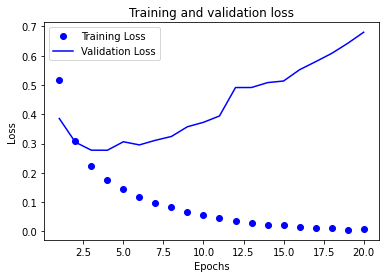

In [79]:
# 실험 결과를 시각화 한다. 
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss,'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

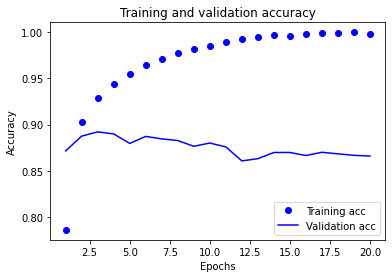

In [80]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b-', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [81]:
# 새로 모델 초기화 시키기기

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy']) 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/3
30/30 [==============================] - 2s 62ms/step - loss: 0.5251 - accuracy: 0.7826 - val_loss: 0.4288 - val_accuracy: 0.8229
Epoch 2/3
30/30 [==============================] - 1s 37ms/step - loss: 0.3084 - accuracy: 0.9030 - val_loss: 0.3072 - val_accuracy: 0.8868
Epoch 3/3
30/30 [==============================] - 1s 36ms/step - loss: 0.2199 - accuracy: 0.9286 - val_loss: 0.3187 - val_accuracy: 0.8686


In [82]:
# 제약 걸고 학습하기.
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=512,
                    validation_data=(x_val,y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/3
30/30 [==============================] - 4s 47ms/step - loss: 0.5149 - accuracy: 0.7973 - val_loss: 0.3948 - val_accuracy: 0.8731
Epoch 2/3
30/30 [==============================] - 1s 45ms/step - loss: 0.3164 - accuracy: 0.9022 - val_loss: 0.3098 - val_accuracy: 0.8891
Epoch 3/3
30/30 [==============================] - 2s 69ms/step - loss: 0.2309 - accuracy: 0.9247 - val_loss: 0.3383 - val_accuracy: 0.8616


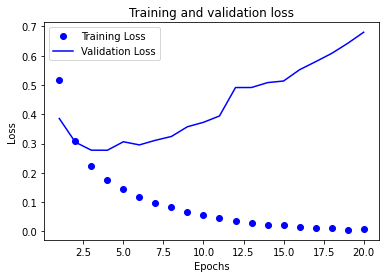

In [83]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss,'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 번외편
enumerate에 대하여

In [60]:
for i, c in enumerate(['A','B','C'],start =1):
  print(i,c)

1 A
2 B
3 C


In [61]:
temp = enumerate(['A','B','C'])
next(temp)
next(temp)
next(temp)

(2, 'C')